In [1]:
! pip install ase

     |████████████████████████████████| 2.2MB 3.4MB/s 


In [2]:
import ase.io
from ase.neb import NEBTools
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os

In [5]:
neb_images = 5
parent_neb = parent_neb = ase.io.read("/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/ORIGINAL NEB/actual_neb1.traj", f"-{neb_images}:")
parent_db = ase.io.read("/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/ORIGINAL NEB/DFT_database1.db", ":")

In [6]:
print(f"Total DFT calls: {len(parent_db)}")

Total DFT calls: 161


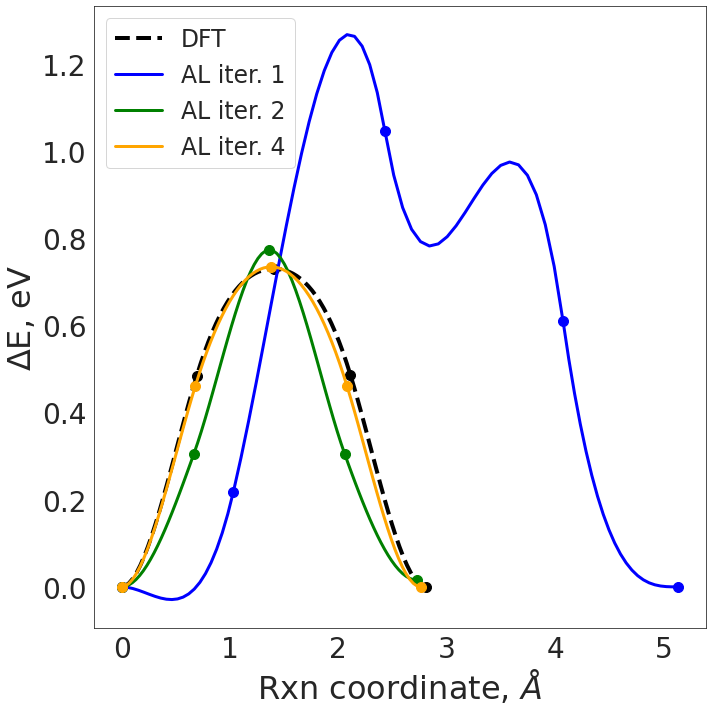

In [7]:
Ef_all = []
dE_all = []
sns.set_style("white")
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(1,1,1)

parent_neb = ase.io.read("/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/ORIGINAL NEB/actual_neb1.traj", f"-{neb_images}:")
dft_s, dft_e, dft_s_coord, dft_e_coord, _ = ase.utils.forcecurve.fit_images(parent_neb)
axes.plot(dft_s_coord, dft_e_coord, '--', lw=4, label="DFT", color="black")
axes.plot(dft_s, dft_e, 'o', color="black", markersize=10)

colors = ["blue", "green", "orange"]
for i, c in zip([1, 2, 4], colors):
  ml_neb = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/neb_example_2/neb_ml2relax_True_iter_{i}.traj", f"-{neb_images}:")
  ml_s, ml_e, ml_s_coord, ml_e_coord, _ = ase.utils.forcecurve.fit_images(ml_neb)
  axes.plot(ml_s_coord, ml_e_coord, '-', lw=3, label=f"AL iter. {i}", color=c)
  axes.plot(ml_s, ml_e, 'o', markersize=10, color=c)

  Ef, dE = NEBTools(ml_neb).get_barrier()
  Ef_all.append(Ef)
  dE_all.append(dE)

true_Ef = NEBTools(parent_neb).get_barrier()
initial_image = ml_neb[0]
initial_image.set_cell([0,0,0])
final_image = ml_neb[-1]
final_image.set_cell([0,0,0])

ase.io.write("initial.png", initial_image)
ase.io.write("final.png", final_image)

plt.xlabel("Rxn coordinate, $\AA$", fontsize=32)
plt.ylabel("$\Delta$E, eV", fontsize=32)
plt.tick_params(labelsize=28)
plt.legend(fontsize=23.5)
plt.tight_layout()
plt.savefig("neb_comparison.pdf", dpi=300)

In [40]:
neb_images = 5
iter = []
maes = []
random_dft_calls = []
random_terminate_dft_calls = []
for i in range(5):
  try:
    db = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/final_dft_runs_random_3/NEB_iter_{i}/parent_learner.db", ":") 
    db_initial = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/final_dft_runs_random_3/NEB_iter_{i}/parent_database.db", ":") 
    random_dft_calls.append(len(db)+len(db_initial))
    for k in range(15):
        ml_neb = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/final_dft_runs_random_3/NEB_iter_{i}/neb_ml_only_ml2relax_True_iter_{k}.traj", f"-{neb_images}:")
        _, _, ml_s_coord, ml_e_coord, _ = NEBTools(ml_neb).get_fit()
        Ef, dE = NEBTools(ml_neb).get_barrier()
        mae = np.abs(Ef - true_Ef[0])
        maes.append(mae)
        iter.append(2+k*3)
        if mae<0.01:
          random_terminate_dft_calls.append(2+k*3)
          break
  except:
    continue

/usr/local/lib/python3.6/dist-packages/ase/utils/__init__.py:530: FutureWarning: NEBTools.get_fit() is deprecated.  Please use ase.utils.forcecurve.fit_images(images).
  warnings.warn(warning)


In [42]:
# 9 subtracted from each trial since an additional singlepoint was done between each iteration for records of what the framework would have terminated at if a termination strategy was employed
final_random_dft_calls = [i-9 for i in random_dft_calls]
print(f"Average # of DFT calls (full random/no termination strategy): {np.mean(final_random_dft_calls)}")

Average # of DFT calls (full random/no termination strategy): 26.0


In [44]:
neb_images = 5
iter = []
maes = []
custom_dft_calls = []
for i in range(1, 11):
  db = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/neb10iter_custom/neb_example_{i}/parent_learner.db", ":") 
  db_initial = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/neb10iter_custom/neb_example_{i}/parent_database.db", ":") 
  custom_dft_calls.append(len(db)+len(db_initial))
  for k in range(15):
    try:
      ml_neb = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/aug_15_final/neb10iter_custom/neb_example_{i}/neb_ml2relax_custom_iter_{k}.traj", f"-{neb_images}:")
      _, _, ml_s_coord, ml_e_coord, _ = NEBTools(ml_neb).get_fit()
      Ef, dE = NEBTools(ml_neb).get_barrier()
      mae = np.abs(Ef - true_Ef[0])
      maes.append(mae)
      iter.append(2+k*3)
    except:
      continue

/usr/local/lib/python3.6/dist-packages/ase/utils/__init__.py:530: FutureWarning: NEBTools.get_fit() is deprecated.  Please use ase.utils.forcecurve.fit_images(images).
  warnings.warn(warning)


In [45]:
print(f"Average # of DFT calls (query/termination based off critical points - initial, saddle, final positions ): {np.mean(custom_dft_calls)}")

Average # of DFT calls (query/termination based off critical points - initial, saddle, final positions ): 14.6


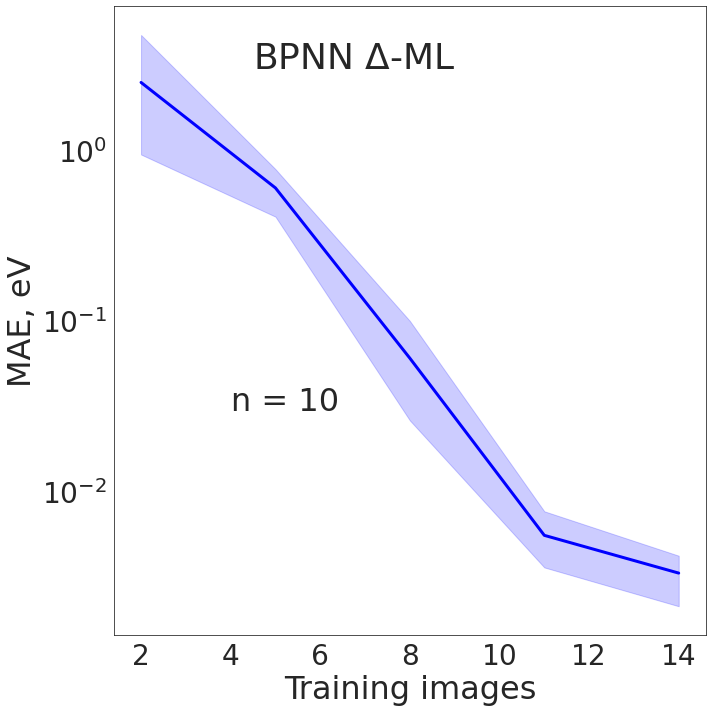

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("white")
sns.lineplot(iter, maes, color='b', linewidth=3)
plt.xlabel("Training images", fontsize=32)
plt.yscale("log")
plt.ylabel("MAE, eV", fontsize=32)
plt.tick_params(labelsize=28)
plt.tight_layout()
plt.text(4.5, 3, "BPNN $\Delta$-ML", fontsize=36)
plt.text(4, 0.03, "n = 10", fontsize=32)
plt.savefig("neb_conv.pdf", dpi=300)
plt.savefig("neb_conv.png", dpi=300)

In [47]:
neb_images = 5
iter = []
maes = []
uncertain_dft_calls = []
for i in range(5):
  db = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/final-dft_runs_uncertain_2/final_dft_runs_uncertain_2/NEB_iter_{i}/parent_learner.db", ":") 
  db_initial = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/final-dft_runs_uncertain_2/final_dft_runs_uncertain_2/NEB_iter_{i}/parent_database.db", ":") 
  uncertain_dft_calls.append(len(db)+len(db_initial))
  for k in range(15):
    try:
      ml_neb = ase.io.read(f"/content/drive/My Drive/CMU - PhD/Research/AMPTorch/Paper/Runs/neb/final-dft_runs_uncertain_2/final_dft_runs_uncertain_2/NEB_iter_{i}/nebmaxuncertainty_iter_{k}.traj", f"-{neb_images}:")
      _, _, ml_s_coord, ml_e_coord, _ = NEBTools(ml_neb).get_fit()
      Ef, dE = NEBTools(ml_neb).get_barrier()
      mae = np.abs(Ef - true_Ef[0])
      maes.append(mae)
      iter.append(2+k*4)
    except:
      continue

/usr/local/lib/python3.6/dist-packages/ase/utils/__init__.py:530: FutureWarning: NEBTools.get_fit() is deprecated.  Please use ase.utils.forcecurve.fit_images(images).
  warnings.warn(warning)


In [48]:
print(f"Average # of DFT calls (query max uncertain points, terminate based off saddle point convergence): {np.mean(uncertain_dft_calls)}")

Average # of DFT calls (query max uncertain points, terminate based off saddle point convergence): 16.6


### DFT call plots

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


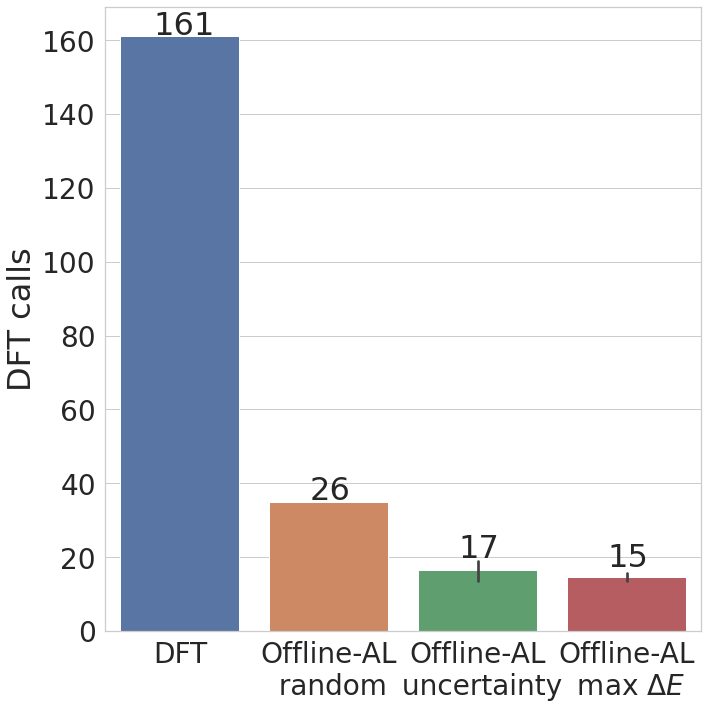

In [53]:
sns.set(style="whitegrid")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.xkcd_palette(colors)
x = ['DFT'] + ['Offline-AL\n random']*len(random_dft_calls) + ['Offline-AL\n uncertainty']*len(uncertain_dft_calls) + ['Offline-AL\n max $\Delta E$']*len(custom_dft_calls)
y = [161] + random_dft_calls + uncertain_dft_calls + custom_dft_calls
plt.figure(figsize=(10,10))
sns.barplot(x, y)
plt.ylabel("DFT calls", fontsize=32)
plt.tick_params(labelsize=28)
plt.text(-0.18, 161.5, 161, fontsize=32)
plt.text(0.87, 35.5, 26, fontsize=32)
plt.text(1.87, 20, 17, fontsize=32)
plt.text(2.87, 17.5, 15, fontsize=32)
plt.tight_layout()
plt.savefig("neb_calls.pdf", dpi=300)
plt.savefig("neb_calls.png", dpi=300)